In [84]:
# 시각화를대비해서 한글화
import sys
import matplotlib.pyplot as plt
# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2

In [85]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [86]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [88]:
display(X.describe())
print(X.describe().columns)
numeric_cols = X.describe().columns

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [89]:
display(X.describe(include='O'))
print(X.describe(include='O').columns)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,47879,48842,48842,47876,48842,48842,48842,48568
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


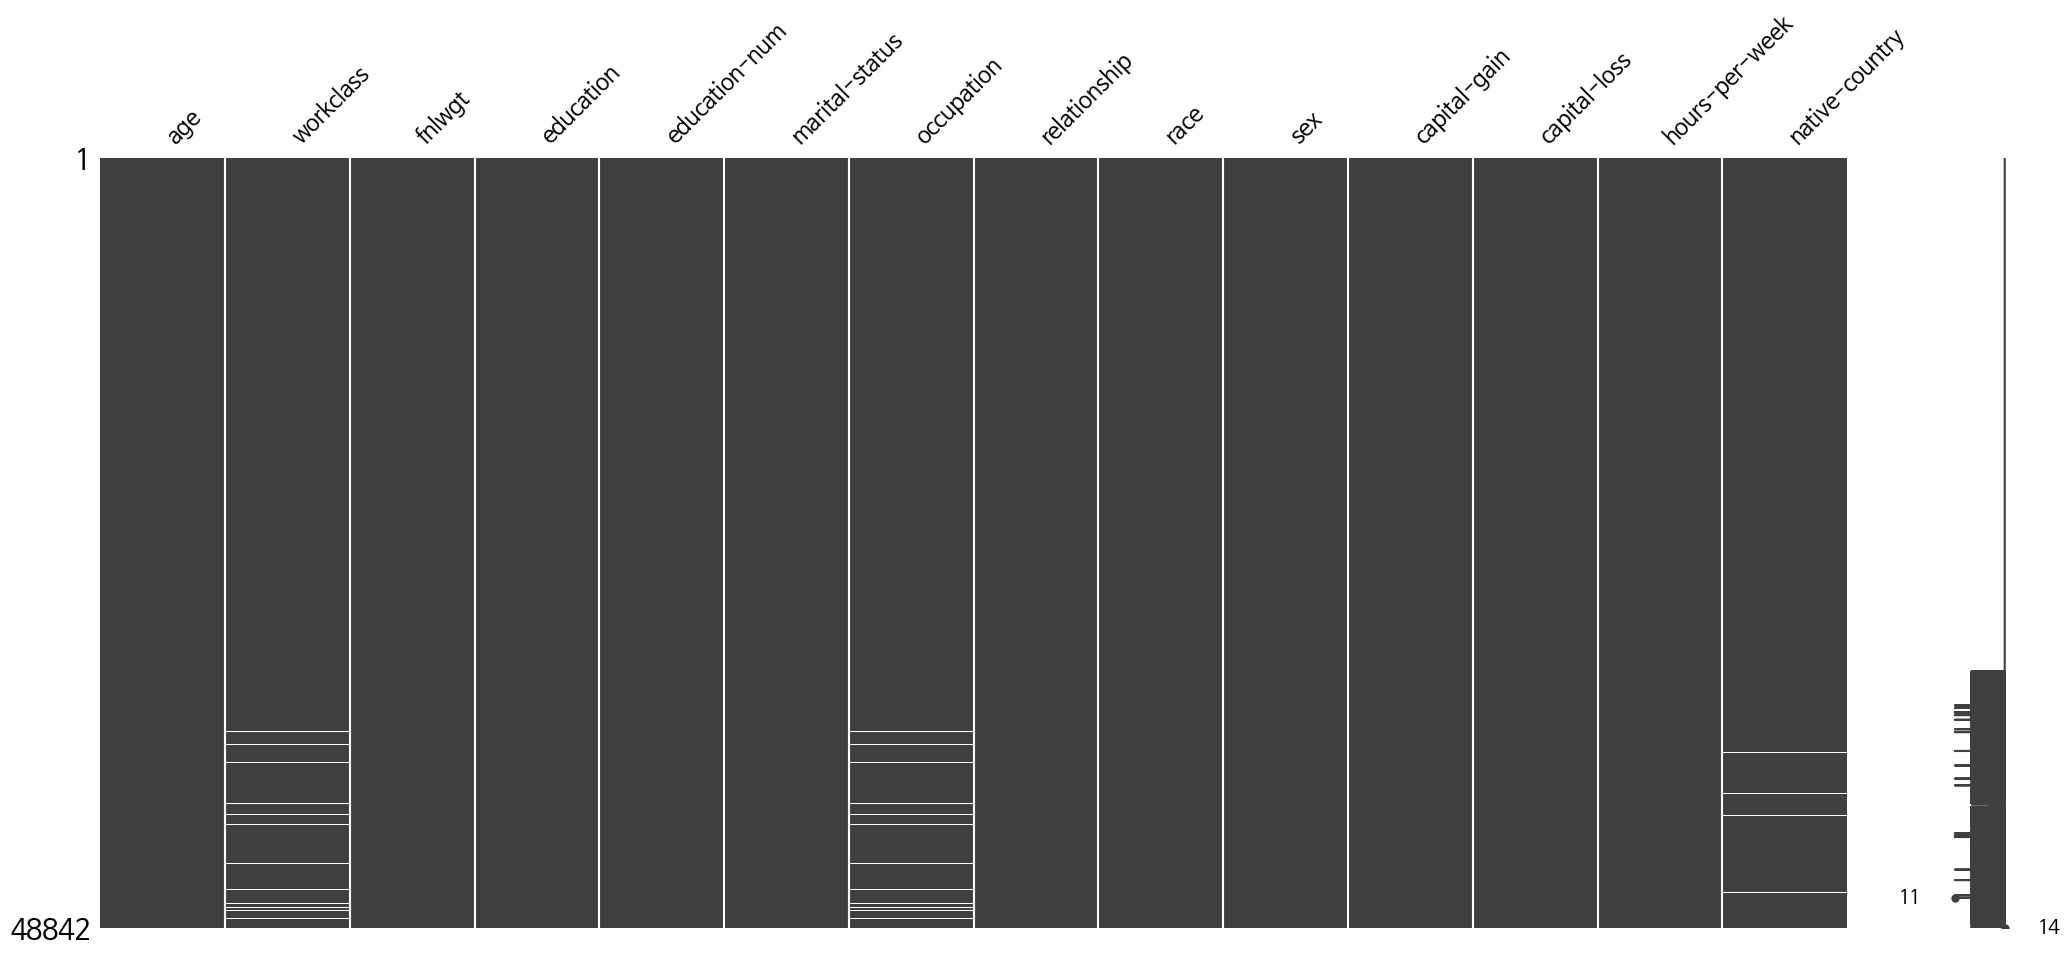

In [90]:
import missingno as msno
import matplotlib.pyplot as plt

# 결측치 시각화
msno.matrix(X)
plt.show()

In [91]:
X.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [92]:
null_col = X.isnull().mean().round(3)
null_col[null_col>0]

,0
workclass,0.020
occupation,0.020
native-country,0.006


In [93]:
X.duplicated().value_counts()

,count
False,48789
True,53


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = X.copy()

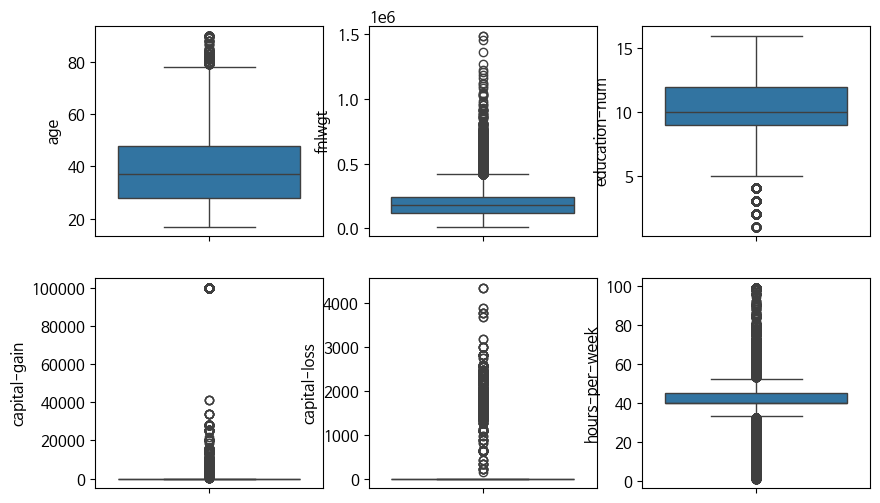

In [95]:
# 화면을 분할해서 범주형 데이터들에 대한 boxplot subplot
plt.figure(figsize=(10,6))
for i in range(len(numeric_cols)):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[numeric_cols[i]])
plt.show()

In [96]:
df.dropna(inplace=True)

In [97]:
def remove_outliers(df, col):
  Q1 = df[col].quantile(.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return df[(df[col] <= upper) & (df[col] >= lower)]

In [98]:
for col in numeric_cols:
  df = remove_outliers(df, col)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


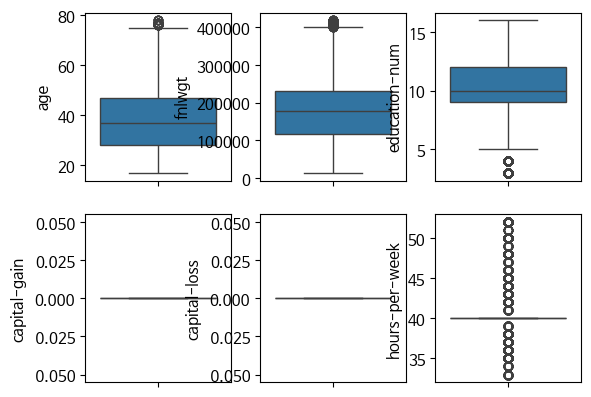

In [99]:
for idx,col in enumerate(numeric_cols):
  plt.subplot(2,3,idx+1)
  sns.boxplot(df[col])
plt.show()

<Axes: >

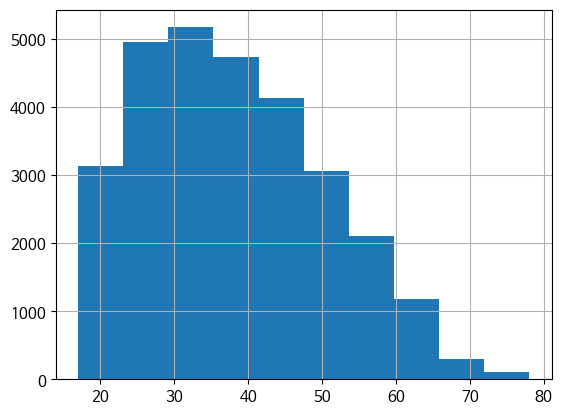

In [100]:
df['age'].hist()

<Axes: >

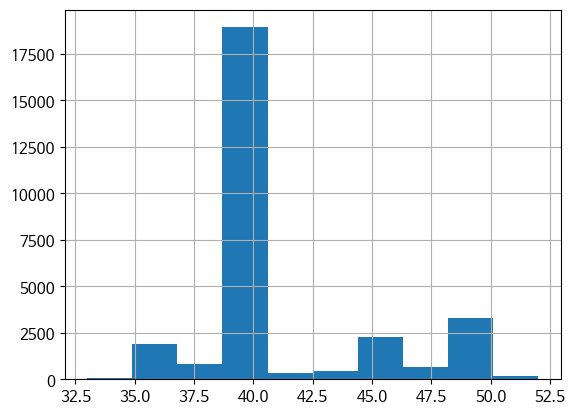

In [101]:
df['hours-per-week'].hist()

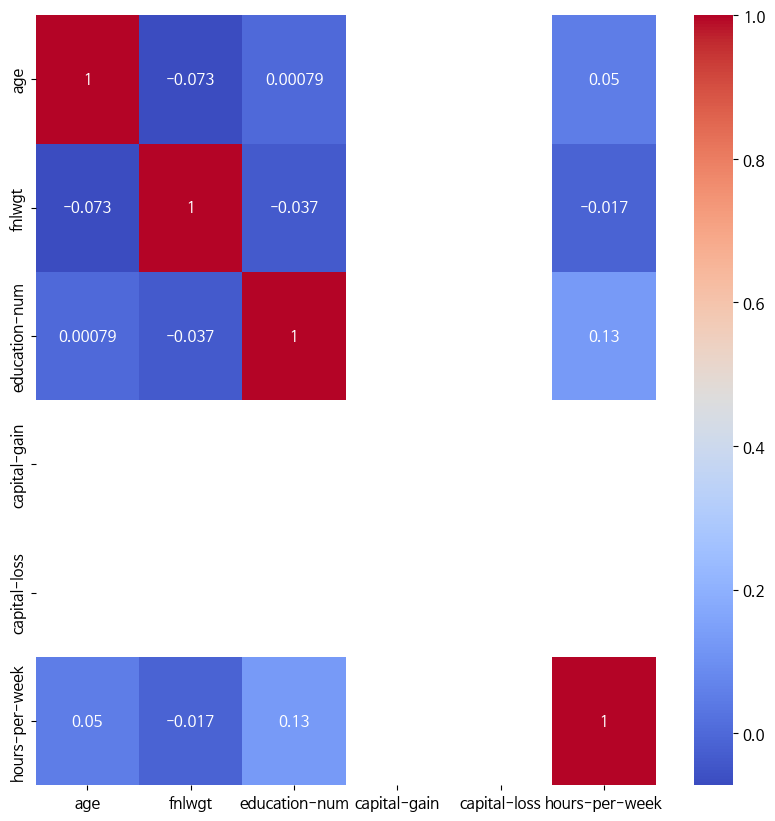

In [102]:
# 변수간의 상관관계(연속형 변수만)
correlation = df[numeric_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# 서울시 따릉이 대어 분석
```
년 월 일 요일 시간별 대여현황
필요시 추가데이터는 크롤링도 사용가능
지도로 시각화 : 대여장소등  Folium
```

In [103]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/data/서울특별시 공공자전거 대여이력 정보_2412.csv', encoding='cp949')
df.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,0,2024-12-01 00:02:41,04560,양평동성원아파트,0,2,625.1,1997,M,내국인,ST-278,ST-2811,일반자전거
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,0,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,0,2,0.0,1983,NaN,내국인,ST-1710,ST-2049,일반자전거
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,0,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,0,3,890.0,1991,\N,내국인,ST-294,ST-1539,일반자전거


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277919 entries, 0 to 2277918
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  object 
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(1), object(15)
memory usage: 295.4+ MB


In [105]:
# 데이터 타입변환  object - date
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277919 entries, 0 to 2277918
Data columns (total 17 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  object        
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(13)
memory usage: 295.4+ MB


In [106]:
# 나이 컬럼 추가
# df['age'] = 2025 - df['생년']
# 생년에 숫자가 아닌 값일 있는지 여부
# df['생년'].unique()
df = df[df['생년']!= '\\N']
df['생년'] = df['생년'].astype('int')
df['나이'] = 2025 - df['생년']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951447 entries, 0 to 2277915
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  object        
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        int64         
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  나이        int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(12)
memory usage: 282.9+ MB


<Axes: >

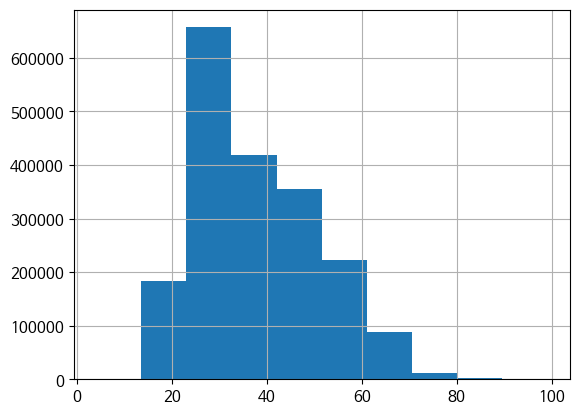

In [108]:
df[(df['나이'] > 0) & (df['나이'] < 100)]['나이'].hist()

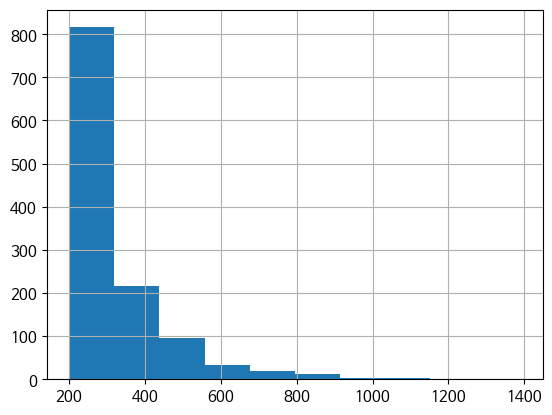

In [109]:
# 이용시간 분석
# 이상치 여부 - boxplot hist
df[df['이용시간(분)'] > 200]['이용시간(분)'].hist()
# 자전거를 하루이상 대여한 기간은 제외 - 이상치
df = df[df['이용시간(분)'] < 800]

In [110]:
# 이용시간 이용거리 나이 통계
df[['이용시간(분)','이용거리(M)','나이']].describe()

,이용시간(분),이용거리(M),나이
count,1.951430e+06,1.951430e+06,1.951430e+06
mean,1.764397e+01,1.851870e+03,3.777163e+01
std,2.354502e+01,2.199496e+03,1.728724e+01
min,0.000000e+00,0.000000e+00,-7.400000e+01
25%,5.000000e+00,7.517800e+02,2.800000e+01
50%,9.000000e+00,1.224510e+03,3.500000e+01
75%,1.900000e+01,2.116028e+03,4.700000e+01
max,7.920000e+02,1.520409e+05,2.025000e+03


In [111]:
display(df['성별'].value_counts())

,count
성별,
M,940473
\N,490484
F,461767
m,243
f,190


In [112]:
# display(df['성별'].value_counts())
df['성별'] = df['성별'].replace('\\N', np.nan)
df.dropna(inplace=True)

In [113]:
for col in df.describe(include='O').columns:
  df[col] = df[col].str.lower()

In [114]:
# 중간정리 를 통해 전처리
import pandas as pd
import numpy as np
# 1.단순결측치나 중복데이터는 제거
original = pd.read_csv('/content/drive/MyDrive/data/서울특별시 공공자전거 대여이력 정보_2412.csv', encoding='cp949')
df = original.copy()

In [115]:
# 2. \\n 이런종류의 데이터는 nan으로 대처하고 drop
df.replace(r'\N',np.nan,inplace=True)
df.replace(r'\\N',np.nan,inplace=True)
df.dropna(inplace=True)
df['성별'] = df['성별'].apply(lambda x: x.lower())
# 3. 나이 컬럼 추가
df['생년'] = df['생년'].astype('int')
df['나이'] = 2025-df['생년']
# 4. 0 < age < 100
df = df[(df['나이'] > 0) & (df['나이'] < 100)]
# 5. 이용시간 200분 이하로
df = df[df['이용시간(분)'] < 200]

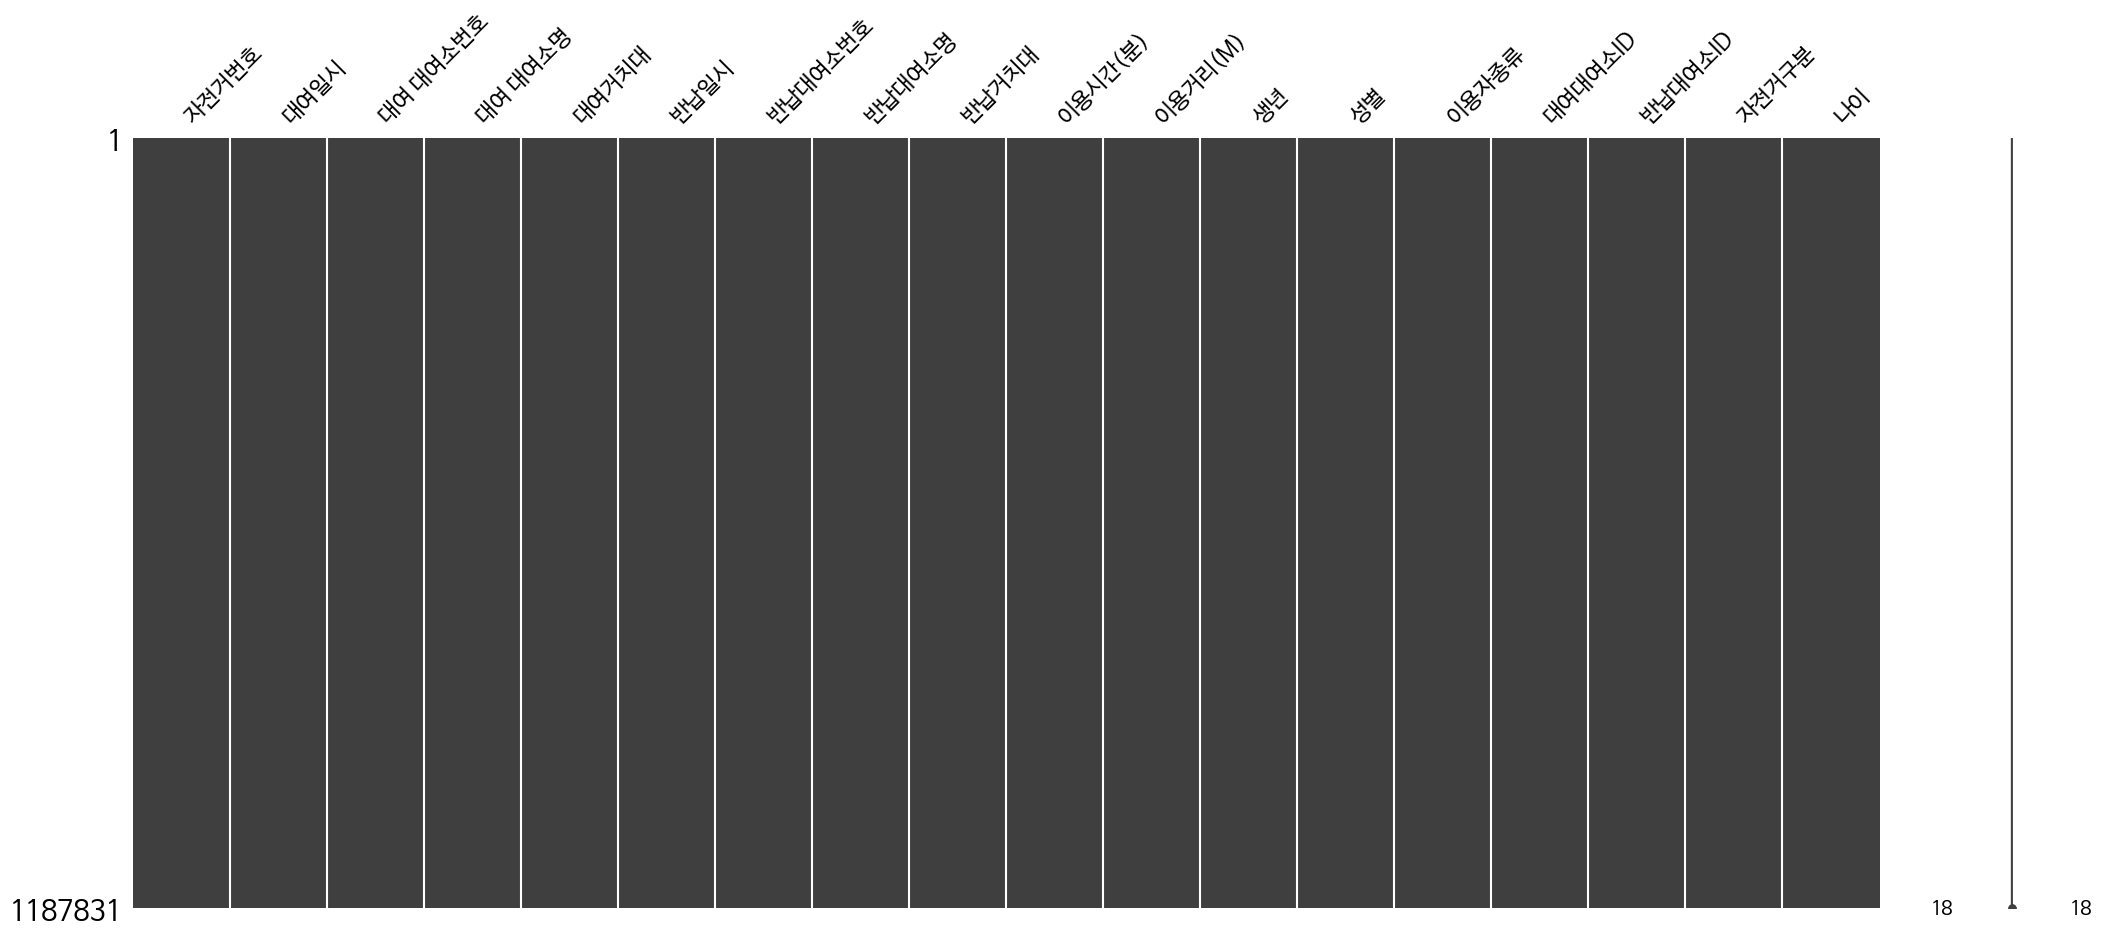

In [116]:
import missingno as msno
import matplotlib.pyplot as plt

# 결측치 시각화
msno.matrix(df)
plt.show()

<Figure size 1000x400 with 0 Axes>

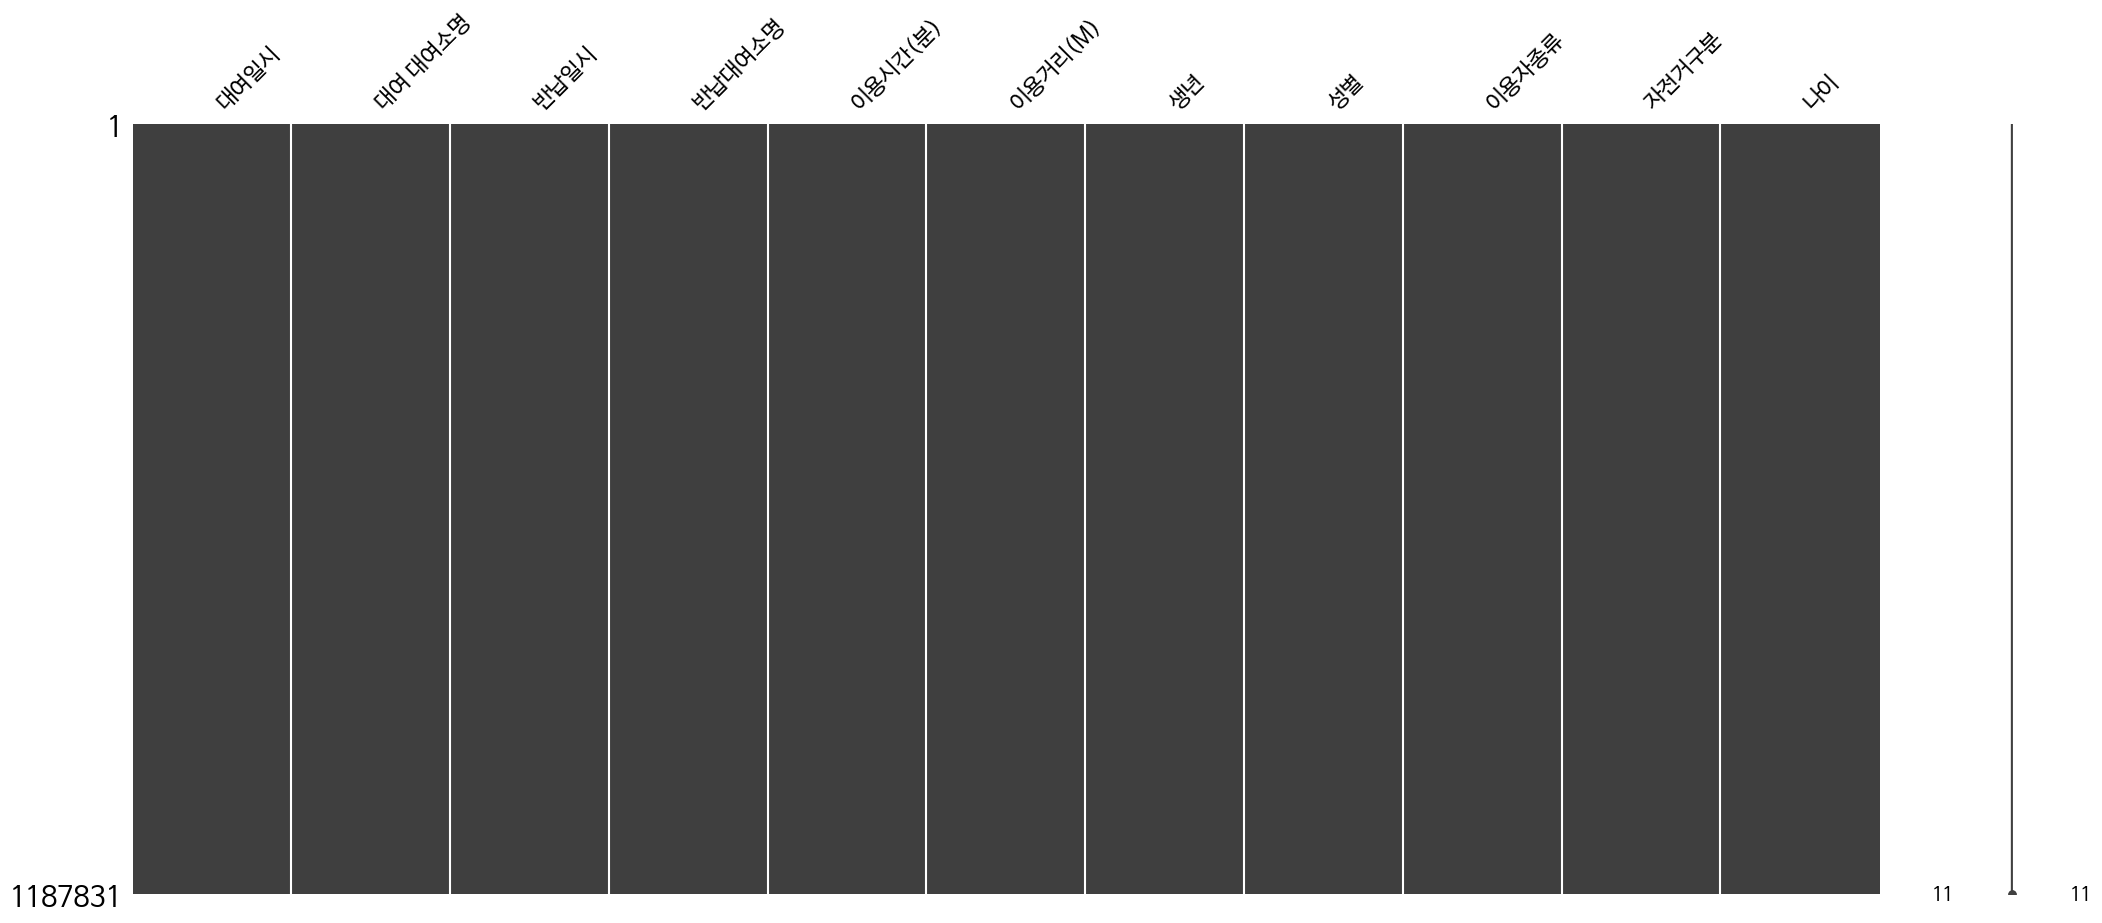

In [117]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# 필요없는 컬럼 삭제
remove_cols = ['자전거번호','대여 대여소번호','대여거치대','반납대여소번호','반납거치대','대여대여소ID','반납대여소ID']
df.drop(remove_cols, axis=1, inplace=True)

# 결측치 시각화
plt.figure(figsize=(10,4))
msno.matrix(df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


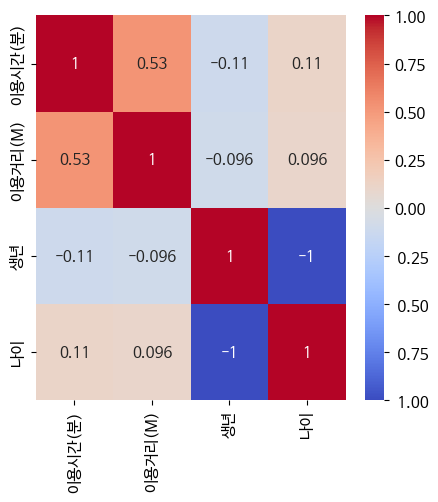

In [118]:
# 수치형데이터들의 상관관계
plt.figure(figsize=(5,5))
numeric_cols = df.select_dtypes(include='number').columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [119]:
# 데이터 타입변환  object - date
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
# 대여시간 시간만 추출
df['대여시간'] = df['대여일시'].dt.hour
# cut을 이용해서 x개 구간으로 나눔 0 6 9 12 15 18 24
df['시간대'] = pd.cut(df['대여시간'],bins=[-1,6,9,12,15,18,24],labels=['새벽','아침','오전','오후','저녁','밤'])
# 시간대별 대여횟수
time_bin_counts =  df['시간대'].value_counts()
# 대여소별 대여 횟수
rent_station_counts =  df['대여 대여소명'].value_counts()
# 성별 평균 이용시간 및 거리
gender_avg_time_distance = df.groupby('성별')[['이용시간(분)','이용거리(M)']].mean()
# 나이를 구간화 분포
df['나이대'] = pd.cut(df['나이'],bins=[0,20,30,40,50,100],labels=['10대','20대','30대','40대','50대이상'])
age_distribution = df['나이대'].value_counts()

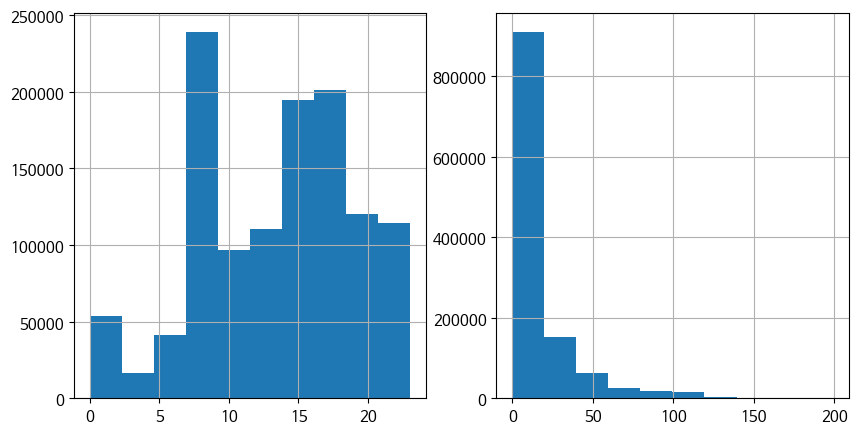

In [120]:
#이용시간 분포 히스토그램
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['대여시간'].hist()
plt.subplot(1,2,2)
df['이용시간(분)'].hist()
plt.show()

In [121]:
rent_station_counts

,count
대여 대여소명,
마곡나루역 2번 출구,6231
마곡나루역 5번출구 뒤편,4744
마곡나루역 3번 출구,4145
"발산역 1번, 9번 인근 대여소",3320
롯데월드타워(잠실역2번출구 쪽),3112
...,...
새정이마을버스정류장 앞,4
구룡터널 입구(개포1단지아파트),2
중앙보훈병원역3번출구,2


In [122]:
# 대여소별 대여횟수 top 10
# plt.title('대여소별 대여횟수')
# rent_station_counts.plot(kind='bar')
# plt.show()
rent_station_counts

,count
대여 대여소명,
마곡나루역 2번 출구,6231
마곡나루역 5번출구 뒤편,4744
마곡나루역 3번 출구,4145
"발산역 1번, 9번 인근 대여소",3320
롯데월드타워(잠실역2번출구 쪽),3112
...,...
새정이마을버스정류장 앞,4
구룡터널 입구(개포1단지아파트),2
중앙보훈병원역3번출구,2


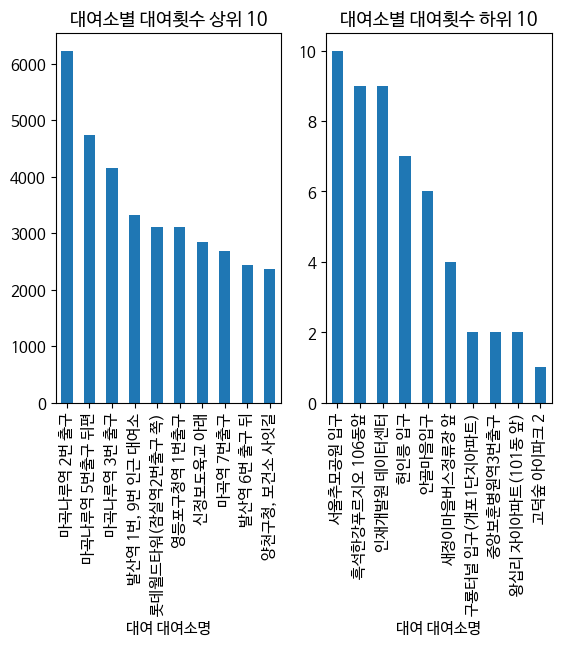

In [123]:
# 대여소별 대여횟수 top 10
plt.subplot(1,2,1)
plt.title('대여소별 대여횟수 상위 10')
rent_station_counts[:10].plot(kind='bar')

plt.subplot(1,2,2)
plt.title('대여소별 대여횟수 하위 10')
rent_station_counts[-10:].plot(kind='bar')

plt.show()

<Axes: xlabel='나이대'>

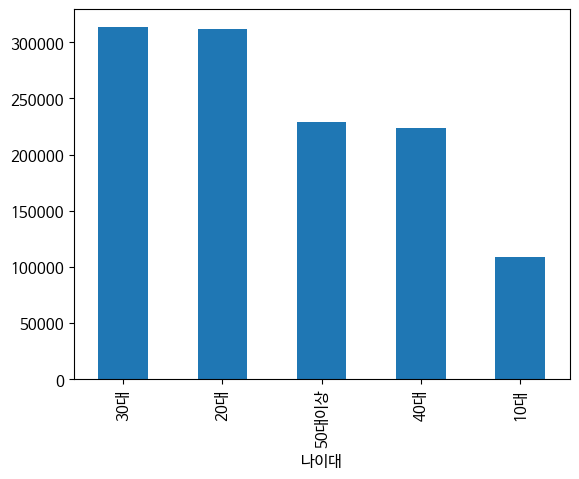

In [124]:
df['나이대'].value_counts().plot(kind='bar')

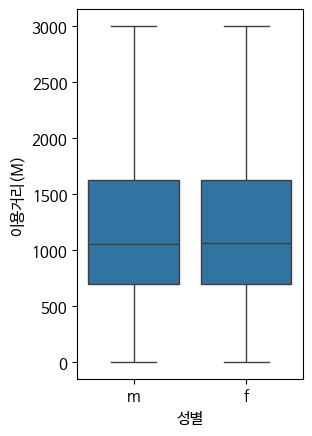

In [125]:
# 성별 이용거리 boxplot
plt.subplot(1,2,1)
df['이용거리(M)']
sns.boxplot(x='성별', y='이용거리(M)', data=df[df['이용거리(M)']<3000])
plt.show()

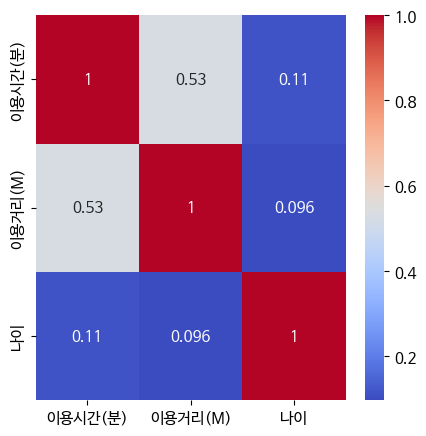

In [126]:
# 수치형 변수의 상관관계
corr = df[['이용시간(분)','이용거리(M)','나이']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# 이용시간대별 상세 분석
```
대여시간
대여분
반납시간
반납분
```

In [127]:
df['대여분'] = df['대여일시'].dt.minute
df['반납시간'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute

In [128]:
df['대여시간대'] = pd.cut(df['대여시간'],bins=[-1,6,9,12,15,18,24],labels=['새벽','아침','오전','오후','저녁','밤'])
df['반납시간대'] = pd.cut(df['반납시간'],bins=[-1,6,9,12,15,18,24],labels=['새벽','아침','오전','오후','저녁','밤'])
# 분단위로 구간을 나누기
df['대여분구간'] = pd.cut(df['대여분'],bins=[-1,15,30,45,60],labels=['15분이하','15분~30분','30분~45분','45분이상'])
print(f"대여시간대별 {df['대여시간대'].value_counts().index}")
print(f"반납시간대별 {df['반납시간대'].value_counts().index}")

대여시간대별 CategoricalIndex(['저녁', '아침', '밤', '오후', '오전', '새벽'], categories=['새벽', '아침', '오전', '오후', '저녁', '밤'], ordered=True, dtype='category', name='대여시간대')
반납시간대별 CategoricalIndex(['저녁', '밤', '아침', '오후', '오전', '새벽'], categories=['새벽', '아침', '오전', '오후', '저녁', '밤'], ordered=True, dtype='category', name='반납시간대')


<Axes: xlabel='대여시간대'>

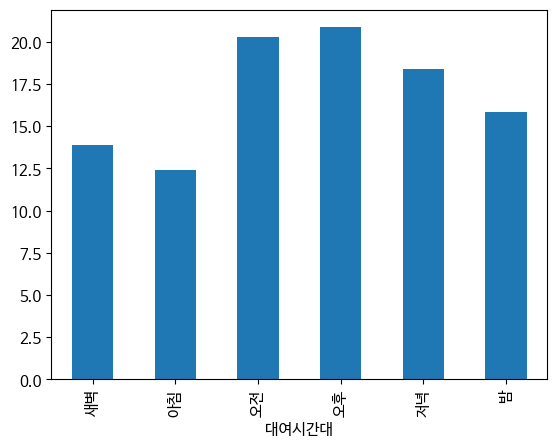

In [129]:
# 시간대별 평균 이용시간
df.groupby('대여시간대', observed=True)['이용시간(분)'].mean()
df.groupby('대여시간대', observed=True)['이용시간(분)'].mean().plot(kind='bar')

<Axes: xlabel='대여요일'>

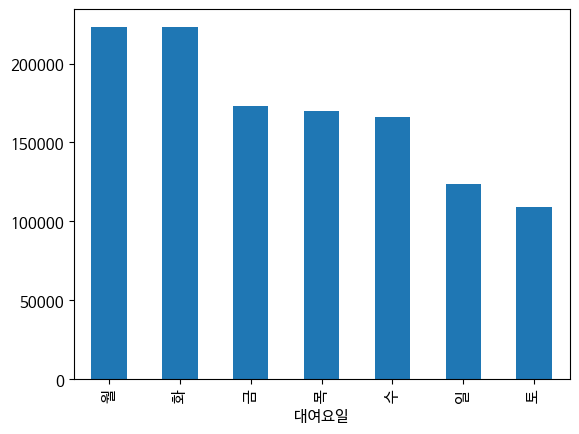

In [130]:
temp = dict(zip(range(7), ['월','화','수','목','금','토','일']))
df['대여요일'] = df['대여일시'].dt.weekday.map(temp)
df['반납요일'] = df['반납일시'].dt.weekday.map(temp)
df['대여요일'].value_counts().plot(kind='bar')

In [131]:
# cross tab 요일별 대여소 이용 밀도
pd.crosstab(df['대여요일'],df['대여 대여소명'])

대여 대여소명,(시립)고덕평생학습관,(재)FITI시험연구원,3호선 매봉역 3번출구앞,419민주묘지 입구사거리,419민주묘지역,419민주묘지역 1번출구,419탑 앞,"500번,507번 버스 종점 앞",63스퀘어,7번가피자 서교망원점,...,흑석역 1번출구,흑석역 4번출구,흑석한강푸르지오 106동앞,흑석한강푸르지오(110동),흥국사 정류장,희성오피앙,희훈타워빌 앞,힐스테이트에코,힐스테이트창경궁 아파트 앞,힐스테이트클래시안아파트
대여요일,,,,,,,,,,,,,,,,,,,,,
금,48,122,122,30,28,28,49,14,147,107,...,44,21,1,17,5,34,87,270,80,48
목,47,119,124,36,17,36,55,5,131,119,...,53,36,2,17,2,33,85,222,68,68
수,57,103,120,21,22,39,44,15,116,103,...,54,24,0,5,5,29,68,213,59,54
월,78,184,144,39,23,45,63,12,192,171,...,65,32,0,17,2,49,99,278,78,63
일,46,32,52,31,22,27,69,10,37,102,...,28,18,2,4,4,37,70,128,52,56
토,43,36,54,23,25,23,45,6,53,67,...,72,29,4,8,3,28,52,119,35,45
화,68,149,158,34,24,37,56,11,204,166,...,69,39,0,10,6,43,110,317,79,80


In [132]:
# 주중에 사용 빈도가 높음(월,화)
# 남년간의 이용률의 차이는 거의 없음
# 시간대 9시대하고 14~17시 구간이 많음

In [133]:
# REST_API_KEY = '0426e7808e909b84262d60d469fb1854'
from urllib import request
REST_API_KEY = '5e4c6b12b36a53a95607c973b7918393'
# url = 'https://dapi.kakao.com/v2/local/search/address.json'
FORMAT = 'PK6'
url = f'https://dapi.kakao.com/v2/local/search/keyword.{FORMAT}'
H = {
    'Authorization':f'KakaoAK {REST_API_KEY}'
}
data_urlencode =  "센트럴파크타워 앞"
import requests
response = requests.get(url,headers=H,params={'query':data_urlencode})
print(response.status_code)
print(response.json())
print(response.json())

200
{'documents': [], 'meta': {'is_end': True, 'pageable_count': 0, 'same_name': {'keyword': '센트럴파크타워 앞', 'region': [], 'selected_region': ''}, 'total_count': 0}}
{'documents': [], 'meta': {'is_end': True, 'pageable_count': 0, 'same_name': {'keyword': '센트럴파크타워 앞', 'region': [], 'selected_region': ''}, 'total_count': 0}}


In [134]:
rider_df =  pd.read_excel('/content/drive/MyDrive/data/공공자전거 대여소 정보(24.12월 기준).xlsx',sheet_name='대여소현황', header=2)
rider_df.rename(columns={'Unnamed: 1':'대여 대여소명'},inplace=True)
rider_df = rider_df[rider_df['대여 대여소명'].notna()]
rider_df['대여 대여소명'] = rider_df['대여 대여소명'].apply(lambda x: x.strip())
df['대여 대여소명'] = df['대여 대여소명'].apply(lambda x: x.strip())

In [135]:
merged_df = pd.merge(df,rider_df,on='대여 대여소명')[['대여 대여소명','위도','경도']]
merged_df.head()
# Folium

,대여 대여소명,위도,경도
0,선유도역 3번출구 앞,37.538460,126.894508
1,신트리공원 입구,37.513950,126.856056
2,센트럴파크타워 앞,37.527035,126.966179
3,천왕이펜하우스3단지 앞,37.482239,126.838531
4,양천향교역 7번출구앞,37.567680,126.840897


In [136]:
# import folium
# from folium.plugins import MarkerCluster
# from tqdm import tqdm
# m = folium.Map(location=(37.566535	,126.9779692),zoom_start=12)
# marker_cluster = MarkerCluster().add_to(m)

# for i in tqdm(range(len(merged_df))):
#   folium.Marker(
#       location=[ merged_df.loc[i,'위도'], merged_df.loc[i,'경도'] ],
#       tooltip="서울시 자전거 대여소",
#       popup=merged_df.loc[i,'대여 대여소명'],
#       icon=folium.Icon(icon="cloud"),
#   ).add_to(marker_cluster)

In [137]:
# m.save('/content/drive/MyDrive/data/서울시 자전거 대여소.html')

In [138]:
merged_df.dropna(inplace=True)
merged_df = merged_df.reset_index()

In [139]:
import folium
from folium.plugins import MarkerCluster
from tqdm import tqdm
m = folium.Map(location=(37.566535	,126.9779692),zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

# for i in tqdm(range(len(merged_df))):
for i in tqdm(range(100)):
  folium.Marker(
      location=[ merged_df.loc[i,'위도'], merged_df.loc[i,'경도'] ],
      tooltip="서울시 자전거 대여소",
      popup=merged_df.loc[i,'대여 대여소명'],
      icon=folium.Icon(icon="cloud"),
  ).add_to(marker_cluster)

100%|██████████| 100/100 [00:00<00:00, 8774.14it/s]


In [154]:
merged_df = pd.merge(df,rider_df,on='대여 대여소명', how='left')[['자치구','대여 대여소명','위도','경도']]
rent_count = merged_df['대여 대여소명'].value_counts().reset_index()
merged_df = pd.merge(merged_df,rent_count,on='대여 대여소명', how='left')
merged_df = merged_df.groupby(['자치구']).agg({
    'count' : 'sum',
    '위도' : 'mean',
    '경도' : 'mean'
}).reset_index()
merged_df.head()

import folium
from folium.plugins import MarkerCluster
from tqdm import tqdm
m = folium.Map(location=(37.566535	,126.9779692),zoom_start=12)
# marker_cluster = MarkerCluster().add_to(m)

# # 구별 마커 적용
# for idx, row in merged_df.iterrows():
#   # print(row['count'], row['위도'], row['경도'])
#   folium.Marker(
#     location=[ row['위도'], row['경도'] ],
#     popup=f"{row['자치구']} : {row['count']}",
#     icon=folium.Icon(icon="info-sign", color='green'),
#   ).add_to(marker_cluster)

  # 대여횟수에 따라서 원의 크기를 조정
import numpy as np
from sklearn.preprocessing import MinMaxScaler   # 0 ~1사이로
mm = MinMaxScaler()
# 데이터 정규화
mm.fit_transform(merged_df[['count']])*500  #0 ~ 500 사이로
merged_df['count'] = mm.fit_transform(merged_df[['count']])*100

for idx, row in merged_df.iterrows():
    folium.CircleMarker(
    location=[ row['위도'], row['경도'] ],
    popup=f"{row['자치구']} : {row['count']}",
    radius = row['count'],
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity = 0.6
  ).add_to(m)
m